# SUMMER ANALYTICS 2021

## WEEK-4 ASSIGNMENT


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import IPython.display as ipd
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

### Let's explore the dataset shall we?
Music conoeisseurs have been trying for a long time to understand sound and what differenciates one song from another. How to visualize sound. What makes a tone different from another.

In this notebook we will go through an in depth analysis of sound and how we can **classify and ultimately understand** it.

I suggest you to use the internet before asking a doubt. Most of your doubts will disappear once you read the documentation or search StackOverflow! 

**Note**: Pay close attention to the markdown cells and the comments.

In [2]:
data = pd.read_csv('SA2021_W4_Music.csv')
data.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.63090,1972.744388,117335.77160,3714.560359,1.080790e+06,0.081851,0.000558,-0.000078,0.008354,-0.000068,0.005535,129.199219,-118.627914,2440.286621,125.083626,260.956909,-23.443724,364.081726,41.321484,181.694855,-5.976108,152.963135,20.115141,75.652298,-16.045410,40.227104,17.855198,84.320282,-14.633434,83.437233,10.270527,97.001335,-9.708279,66.669891,10.183875,45.103611,-4.681614,34.169498,8.417439,48.269444,-7.233477,42.770947,-2.853603,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.69087,2010.051501,65671.87567,3869.682242,6.722448e+05,0.087173,0.001030,-0.000099,0.004950,-0.000103,0.004854,123.046875,-125.590706,2038.344238,122.421226,216.774185,-20.718019,231.979767,50.128387,142.700409,-11.333303,139.243118,21.385401,77.817947,-15.960796,97.364029,19.454103,57.948093,-12.465918,68.271523,17.898169,56.222176,-11.732554,54.373909,8.145000,40.662876,-7.717751,30.808521,8.397150,48.784225,-8.300493,68.584824,4.074709,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.43760,2084.565132,75124.92172,3997.639160,7.907127e+05,0.071383,0.000425,-0.000066,0.012476,0.000065,0.004357,123.046875,-132.441940,3798.532227,115.085175,257.321289,-14.811666,192.448074,50.189293,144.166031,-0.680819,128.376892,24.650375,66.371170,-13.506104,89.319336,15.643386,55.253967,-13.216637,120.308785,10.406025,35.757862,-7.991465,47.911613,11.853963,36.569931,-4.677677,40.725075,6.571110,30.686846,-2.424750,50.313499,4.806280,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.28450,1960.039988,82913.63927,3568.300218,9.216524e+05,0.069426,0.000304,-0.000014,0.008318,0.000018,0.005927,123.046875,-118.231087,2508.781006,132.116501,332.650574,-18.758335,109.357529,39.769306,184.693344,-13.260426,144.398224,20.468134,122.516464,-14.563448,68.937332,18.745104,74.748886,-13.755463,73.868576,12.993759,41.549564,-12.648887,58.540478,10.389314,39.102024,-4.362739,60.714748,9.156193,40.411537,-9.889441,44.666325,-1.359111,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.26765,1948.503884,60204.02027,3469.992864,6.102111e+05,0.070095,0.000289,0.000041,0.009634,-0.000106,0.005833,123.046875,-105.968376,2118.919922,134.643646,219.562622,-19.961748,171.878754,40.171753,103.120712,-14.271939,102.651230,18.734617,79.070000,-15.619381,48.510284,19.207966,53.642956,-18.274683,95.300995,14.316693,58.821163,-5.792194,55.030254,17.045437,43.229939,-5.681399,46.515259,5.705521,24.956211,-7.986080,39.816933,2.092937,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [3]:
data.describe()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,5999.0,5999.000000,5999.000000,5999.000000,5.999000e+03,5999.000000,5.999000e+03,5999.000000,5.999000e+03,5998.000000,5.998000e+03,5998.000000,5998.000000,5998.000000,5.998000e+03,5998.000000,5.998000e+03,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000
mean,66149.0,0.353563,0.086114,0.117594,2.495435e-03,1984.403677,3.368821e+05,2099.207724,1.064515e+05,4107.841584,1.398796e+06,0.091531,0.002067,-0.000312,1.116103e-02,-0.000321,4.597984e-03,124.221133,-174.786313,2759.124363,109.804676,564.509499,-10.194536,363.824993,37.025934,173.030536,-2.548896,140.853065,14.496320,100.388617,-7.001593,92.609551,9.582401,71.697049,-8.815685,72.740455,7.360217,67.527308,-6.795303,64.933065,4.075376,60.154732,-4.970988,59.360581,1.908302,55.886471,-4.143262,54.765936,1.210805,51.633310,-3.832927,53.574033,0.309769,54.432168,-2.397027,57.844663,-1.377912,62.174738
std,0.0,0.090104,0.007960,0.067070,3.485897e-03,723.244367,3.686025e+05,542.408895,9.099881e+04,1625.076926,1.306615e+06,0.041692,0.003019,0.001908,1.192963e-02,0.000980,6.000791e-03,34.025544,114.349962,2491.744030,36.417572,445.362832,22.543083,295.251865,16.087323,128.901100,13.064269,109.949539,12.603531,72.243906,10.361274,62.632359,11.016446,44.269508,8.575617,45.019595,9.038454,42.679280,7.853899,42.644125,7.541877,41.644035,6.902585,37.611197,6.267035,38.167619,5.933154,39.202297,6.128159,34.842993,5.782313,37.506058,5.516549,39.224387,5.312977,44.726713,5.702610,51.286389
min,66149.0,0.107108,0.038064,0.000953,4.380000e-08,472.741636,8.118813e+02,499.162910,1.430000e+02,658.336275,3.679120e+03,0.013525,0.000005,-0.026672,9.310000e-23,-0.008794,4.670000e-08,24.377211,-662.171631,25.190538,-10.886640,19.262325,-80.852173,14.281029,-20.885721,11.110720,-47.279011,9.754141,-28.287092,8.867343,-40.497028,7.561506,-34.582428,6.899100,-35.447067,8.363291,-32.833546,7.584913,-40.008194,7.393024,-22.844913,9.054798,-29.350500,8.195431,-22.093311,7.516350,-30.467087,6.239604,-25.544535,3.070262,-27.809795,1.624544,-19.951777,3.437439,-27.448456,3.065302,-35.640659,1.429122
25%,66149.0,0.283428,0.081152,0.067613,5.359040e-04,1405.880604,9.681349e+04,1666.199006,4.439730e+04,2800.579411,4.789794e+05,0.059287,0.000438,-0.000093,3.097984e-03,-0.000410,4.771073e-04,99.384014,-237.319420,1238.106750,83.784674,266.608772,-26.025083,168.617146,26.083437,82.205397,-11.586011,64.754681,4.941069,50.215464,-14.751993,48.050278,1.702457,40.925292,-15.079334,41.807886,0.742680,39.220999,-12.260216,38.026088,-1.155278,35.365519,-9.629713,36.319389,-2.282216,33.390800,-7.978129,32.440410,-2.699449,30.702130,-7.560994,30.938818,-3.200320,31.172771,-5.695475,32.203474,-4.603108,32.343199
50%,66149.0,0.354989,0.085598,0.112289,1.421113e-03,1933.052560,2.169865e+05,2125.407184,8.152111e+04,4092.219614,1.014956e+06,0.086330,0.001057,-0.000010,7.303189e-03

#### 0. What is the shape of the dataset?

In [4]:
data.shape

(5999, 59)

## Since we now know basic EDA, let's try to visualize this dataset:

#### Plot Correlation heatmap for all the mean variables [Columns based on Mean]:



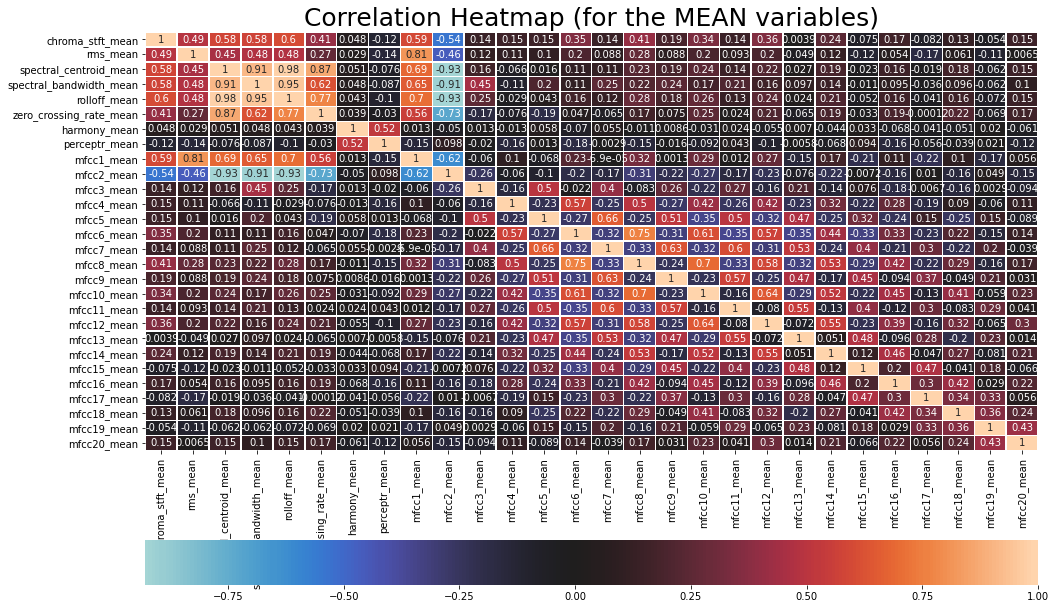

In [5]:
cols = [col for col in data.columns if 'mean' in col]
corr = data[cols].corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))

f, ax = plt.subplots(figsize=(16, 11));

cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

sns.heatmap(corr, center=0, annot = True, linewidths=.5, cbar_kws= {'orientation': 'horizontal'})

plt.title('Correlation Heatmap (for the MEAN variables)', fontsize = 25)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);

#### Draw a Countplot for the labels column

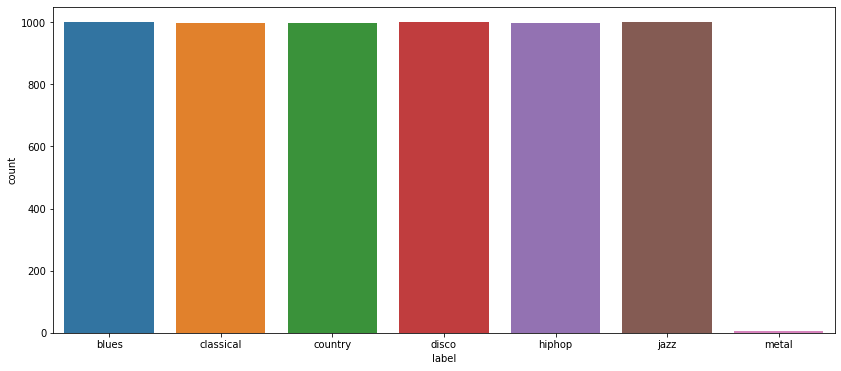

In [6]:
plt.figure(figsize=(14,6))
sns.countplot(data.label);

#### Draw a boxplot for the tempo vs labels column. Think carefully about what a boxplot represents.

Text(0, 0.5, 'BPM')

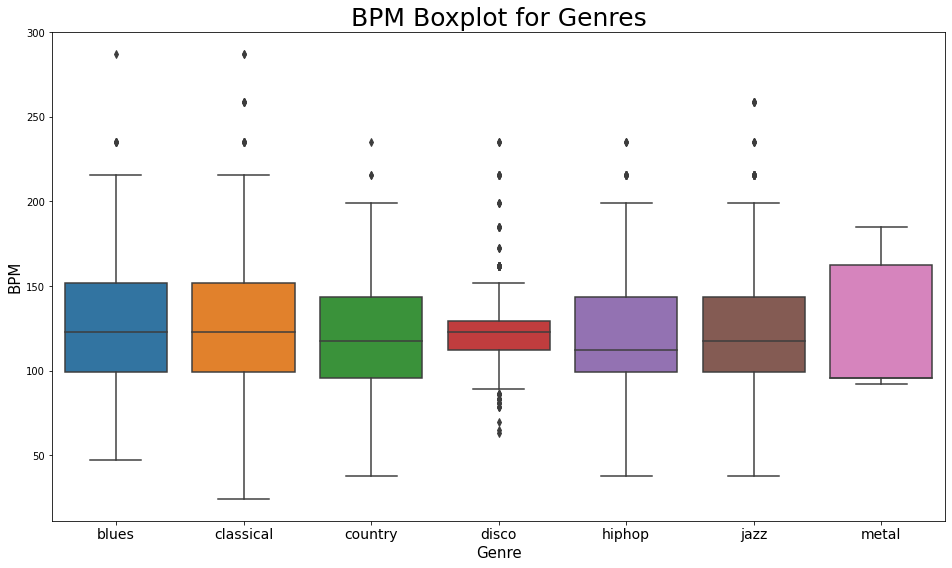

In [7]:
f, ax = plt.subplots(figsize=(16, 9));
sns.boxplot(x = "label", y = "tempo", data = data);

plt.title('BPM Boxplot for Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)

### Now let's perform Machine Learning Classification. We'll be predicting the genre based on the given features.

In [8]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

In [9]:
data = pd.read_csv('SA2021_W4_Music.csv')
data.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.63090,1972.744388,117335.77160,3714.560359,1.080790e+06,0.081851,0.000558,-0.000078,0.008354,-0.000068,0.005535,129.199219,-118.627914,2440.286621,125.083626,260.956909,-23.443724,364.081726,41.321484,181.694855,-5.976108,152.963135,20.115141,75.652298,-16.045410,40.227104,17.855198,84.320282,-14.633434,83.437233,10.270527,97.001335,-9.708279,66.669891,10.183875,45.103611,-4.681614,34.169498,8.417439,48.269444,-7.233477,42.770947,-2.853603,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.69087,2010.051501,65671.87567,3869.682242,6.722448e+05,0.087173,0.001030,-0.000099,0.004950,-0.000103,0.004854,123.046875,-125.590706,2038.344238,122.421226,216.774185,-20.718019,231.979767,50.128387,142.700409,-11.333303,139.243118,21.385401,77.817947,-15.960796,97.364029,19.454103,57.948093,-12.465918,68.271523,17.898169,56.222176,-11.732554,54.373909,8.145000,40.662876,-7.717751,30.808521,8.397150,48.784225,-8.300493,68.584824,4.074709,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.43760,2084.565132,75124.92172,3997.639160,7.907127e+05,0.071383,0.000425,-0.000066,0.012476,0.000065,0.004357,123.046875,-132.441940,3798.532227,115.085175,257.321289,-14.811666,192.448074,50.189293,144.166031,-0.680819,128.376892,24.650375,66.371170,-13.506104,89.319336,15.643386,55.253967,-13.216637,120.308785,10.406025,35.757862,-7.991465,47.911613,11.853963,36.569931,-4.677677,40.725075,6.571110,30.686846,-2.424750,50.313499,4.806280,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.28450,1960.039988,82913.63927,3568.300218,9.216524e+05,0.069426,0.000304,-0.000014,0.008318,0.000018,0.005927,123.046875,-118.231087,2508.781006,132.116501,332.650574,-18.758335,109.357529,39.769306,184.693344,-13.260426,144.398224,20.468134,122.516464,-14.563448,68.937332,18.745104,74.748886,-13.755463,73.868576,12.993759,41.549564,-12.648887,58.540478,10.389314,39.102024,-4.362739,60.714748,9.156193,40.411537,-9.889441,44.666325,-1.359111,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.26765,1948.503884,60204.02027,3469.992864,6.102111e+05,0.070095,0.000289,0.000041,0.009634,-0.000106,0.005833,123.046875,-105.968376,2118.919922,134.643646,219.562622,-19.961748,171.878754,40.171753,103.120712,-14.271939,102.651230,18.734617,79.070000,-15.619381,48.510284,19.207966,53.642956,-18.274683,95.300995,14.316693,58.821163,-5.792194,55.030254,17.045437,43.229939,-5.681399,46.515259,5.705521,24.956211,-7.986080,39.816933,2.092937,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


### Preprocess the data.


In [10]:
# DO NOT EDIT THIS CELL

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
print("SHAPE:",data.shape) # Why did the shape change? What happened?

y = data['label'] # genre variable.
X = data.loc[:, data.columns != 'label'] #select all columns but not the labels

cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)

SHAPE: (2496, 59)


### Splitting the dataset

In [11]:
# DO NOT EDIT THIS CELL

X_train, X_test, y_train, y_test = train_test_split(X, y,stratify = y,test_size=0.1, random_state=42)

### Creating a Predefined function to assess the accuracy of a model. This will be the scoring function

In [12]:
def score(model, title = "Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(confusion_matrix(y_test, preds))
    accuracy = round(accuracy_score(y_test, preds), 5)
    print('Accuracy for', title, ':', accuracy, '\n')

### Let's see how a basic Logistic Regressor works on this!

In [13]:
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
score(lg, "Logistic Regression")

[[28  0  2  0  0  1  2  0]
 [ 0 22  0  0  0  0  0  0]
 [ 2  0 36  8  0  3  2  0]
 [ 1  0  1 35  3  1  0  2]
 [ 1  0  0  2 20  0  0  0]
 [ 1  3  6  0  0 18  0  0]
 [ 0  0  0  2  0  0 38  0]
 [ 0  0  2  2  1  0  0  5]]
Accuracy for Logistic Regression : 0.808 



The accuracy hovers around 74%. Do you think you can beat this? The kaggle microcourses would've surely taught you more than this!

#### Now it's your turn. Train the following: 

4. **AdaBoostClassifier** with n_estimators=1000 & random_state=0
5. **RandomForestClassifier** with n_estimators=1000, max_depth=10, random_state=0

**IMPORTANT**: Use the default values for other hyper parameters apart from these. Do **NOT** change these values 

In [14]:
# AdaBoostClassifier
ab = AdaBoostClassifier(n_estimators=1000,random_state=0)
score(ab,'Ada Boost')

[[ 9  0  5 18  0  1  0  0]
 [ 1 15  1  0  0  5  0  0]
 [ 4  7 23 15  1  1  0  0]
 [ 4  0  3 35  0  0  0  1]
 [ 5  0  1 11  2  0  3  1]
 [ 4  8  8  0  0  8  0  0]
 [ 6  0  1 31  0  1  1  0]
 [ 0  0  0  4  1  0  0  5]]
Accuracy for Ada Boost : 0.392 



In [15]:
# Random Forest
rf = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
score(rf,'Random Forest')

[[25  0  5  2  0  1  0  0]
 [ 0 22  0  0  0  0  0  0]
 [ 0  1 45  3  0  1  1  0]
 [ 0  0  2 40  1  0  0  0]
 [ 1  0  0  0 21  0  1  0]
 [ 2  2  3  0  0 21  0  0]
 [ 0  0  0  0  0  0 40  0]
 [ 0  0  2  1  0  0  0  7]]
Accuracy for Random Forest : 0.884 



AdaBoost performs poorly, but Random Forest looks great!

#### Now look at the import statements. There may be a few models you may or may not have seen. Use those models to beat the score you achieved in the cell above! Play around with their hyper parameters.

We suggest going through their documentations before using them.

In [16]:
# Naive Bayes: GaussianNB
nb = GaussianNB()
score(nb, "Naive Bayes")

# KNN: KNeighborsClassifier
knn = KNeighborsClassifier()
score(knn, "KNN")

# Decission trees: DecisionTreeClassifier
tree = DecisionTreeClassifier()
score(tree, "Decission trees")

[[13  0  3  1  1  5 10  0]
 [ 0 22  0  0  0  0  0  0]
 [ 8  1 26  3  0  4  2  7]
 [ 1  0  0 13  5  1  9 14]
 [ 0  0  0  1 17  1  2  2]
 [ 4  5  2  0  0 15  0  2]
 [ 0  0  0  1  1  0 38  0]
 [ 0  0  2  0  0  0  0  8]]
Accuracy for Naive Bayes : 0.608 

[[30  0  2  0  0  1  0  0]
 [ 0 22  0  0  0  0  0  0]
 [ 2  0 46  2  0  1  0  0]
 [ 0  0  1 39  1  0  0  2]
 [ 1  0  0  1 21  0  0  0]
 [ 2  5  4  0  0 17  0  0]
 [ 1  0  0  3  1  0 35  0]
 [ 0  0  1  0  0  0  0  9]]
Accuracy for KNN : 0.876 

[[25  0  4  2  0  1  1  0]
 [ 0 17  1  0  0  3  0  1]
 [ 3  1 36  2  1  6  1  1]
 [ 0  1  3 36  1  0  0  2]
 [ 1  0  2  2 15  1  2  0]
 [ 4  4  2  1  0 17  0  0]
 [ 0  0  0  1  2  1 36  0]
 [ 1  0  0  2  1  1  0  5]]
Accuracy for Decission trees : 0.748 



6. Did you beat the score yet? Chances are you couldn't. Prove us wrong! Use **XGBClassifier** with n_estimators=1000 and learning_rate=0.05

In [17]:
# XGBClassifier
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
score(xgb, "XGBClassifier")

[[29  0  1  0  1  2  0  0]
 [ 0 22  0  0  0  0  0  0]
 [ 0  0 46  1  0  3  0  1]
 [ 0  1  0 40  1  0  0  1]
 [ 1  0  0  1 21  0  0  0]
 [ 2  1  2  0  0 23  0  0]
 [ 1  0  0  0  0  0 39  0]
 [ 0  0  0  1  0  0  0  9]]
Accuracy for XGBClassifier : 0.916 



You should've beaten the score by now. Now, heres a task for you. Try **XGBRFClassifier** on your own.

In [18]:
# XGBRFClassifier
xgbrf = XGBRFClassifier(n_estimators=1000, learning_rate=0.05)
score(xgbrf, "XGBRFClassifier")

[[17  0  9  3  1  1  2  0]
 [ 0 19  2  0  0  1  0  0]
 [ 1  1 39  5  1  2  1  1]
 [ 1  0  3 38  1  0  0  0]
 [ 1  0  0  3 18  0  1  0]
 [ 3  4  3  0  0 18  0  0]
 [ 0  0  0  1  1  2 36  0]
 [ 0  0  0  4  0  0  0  6]]
Accuracy for XGBRFClassifier : 0.764 



### Till now, it looks like XGBClassifier performs the best. Let's experiment with it a bit more.

7. Plot the Confusion Matrix for XGBClassifier with parameters n_estimators=1000, learning_rate=0.05

In [19]:
y_test.value_counts()

country      51
disco        43
metal        40
blues        33
jazz         28
hiphop       23
classical    22
pop          10
Name: label, dtype: int64

Accuracy : 0.916 



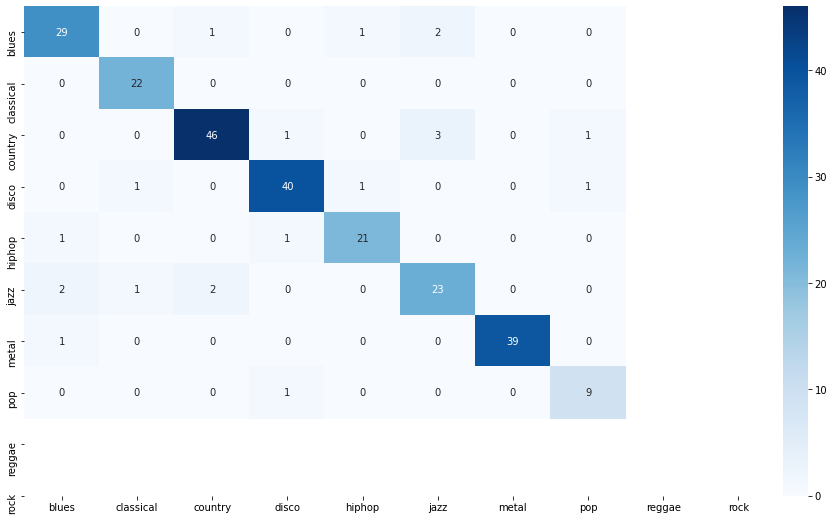

In [20]:
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
xgb.fit(X_train, y_train)

preds = xgb.predict(X_test)

print('Accuracy', ':', round(accuracy_score(y_test, preds), 5), '\n')

# Confusion Matrix
confusion_matr = confusion_matrix(y_test, preds) #normalize = 'true'
plt.figure(figsize = (16, 9))
sns.heatmap(confusion_matr, cmap="Blues", annot=True, 
            xticklabels = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"],
            yticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]);

8. Find the feature importance for XGBClassifier. 

*Hint: It's an inbuilt member variable*

In [21]:
pd.DataFrame({'Features':X.columns,"Importance":xgb.feature_importances_}).sort_values(by = ['Importance'],ascending=False)

,Features,Importance
7,spectral_bandwidth_mean,0.076074
19,mfcc1_var,0.047319
16,perceptr_var,0.046557
24,mfcc4_mean,0.042967
5,spectral_centroid_mean,0.040799
20,mfcc2_mean,0.035739
11,zero_crossing_rate_mean,0.032628
6,spectral_centroid_var,0.029660
15,perceptr_mean,0.029534
1,chroma_stft_mean,0.028754
